In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np

In [28]:
#Lendo os dados
uri = "https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv"
dados = pd.read_csv(uri)
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [29]:
#569 diagnosticos de 33 exames
dados.shape

(569, 35)

In [30]:
# verificando quantos casos B e M temos
dados.diagnostico.value_counts()

B    357
M    212
Name: diagnostico, dtype: int64

In [31]:
# criando coluna para colocar somente os id que sao M e B
#dados['id_M'] = dados.query("diagnostico == 'M'").id
#dados['id_B'] = dados.query("diagnostico == 'B'").id

In [32]:
# verificando a quantidade
#dados[['id_M', 'id_B']].count()

In [33]:
#preenchendo os valores nan com 0
#dados = dados.fillna({'id_M': 0, 'id_B': 0})

In [34]:
#convertendo float para int
#dados['id_M'] = dados['id_M'].apply(np.int64)
#dados['id_B'] = dados['id_B'].apply(np.int64)

In [35]:
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


### Fazendo a separação dos dados em treino e teste

In [36]:
#importando a biblioteca essencial 
from sklearn.model_selection import train_test_split
from numpy import random

In [37]:
#criando uma semente para que os valores nao mudem
seed = 20
random.seed(seed)

#criando uma variavel somente com os exames
valores_exames = dados.drop(columns=['id','diagnostico'])
diagnostico = dados['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [38]:
#utilizando modelo de classificaçõo RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier 

In [39]:
# Numero de arvores será 100 e definindo para o  treino
classificador = RandomForestClassifier(n_estimators= 100)
classificador.fit(treino_x, treino_y)
acuracia = classficador.score(teste_x, teste_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [40]:
#Tratando os valores faltantes da base
#verificando a coluna q possui
dados.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [41]:
#Refazendo o processo

# Mas agora remvoendo tambem o exame 33
seed = 123143
random.seed(seed)

#criando uma variavel somente com os exames
valores_exames_v1 = dados.drop(columns=['id','diagnostico', 'exame_33'])
diagnostico = dados['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                diagnostico, test_size=0.3) #definindo tamanho para 30% dos dados pra teste
print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len(teste_x)))

Treinaremos com 398 elementos e testaremos com 171 elementos


In [42]:
# Numero de arvores será 100 e definindo para o  treino
classificador = RandomForestClassifier(n_estimators= 100)
classificador.fit(treino_x, treino_y)
classificador = classificador.score(teste_x, teste_y)
print("Resultado do classificador %.2f%%" % (classificador *100))

Resultado do classificador 92.40%


In [43]:
#Comparando o resultado baseline 
#importando dummy
from sklearn.dummy import DummyClassifier

In [44]:
seed = 123143
random.seed(seed)

classificador_base = DummyClassifier(strategy='most_frequent')
classificador_base.fit(treino_x,treino_y)

#verificando acuracia
classificador_base = classificador_base.score(teste_x, teste_y)
print("Resultado do classificador base %.2f%%" % (classificador_base *100))

Resultado do classificador base 66.67%


### Construção do Gráfico

In [45]:
#primeiro devemos juntar a variavel diagnositcom exames por coluna. Nesse caso1 coluna diagnostico e o restante os exames
#dados_plot = pd.concat([diagnostico, valores_exames_v1], axis=1)
#Nesse caso quero as colunas exames, valores e diagnostico, portanto usar funçao melt
#dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames")

In [ ]:
#primeiro devemos juntar a variavel diagnostico com exames por coluna. Nesse caso 1 coluna diagnostico e o restante os exames
#temos muitos valores no eixo x, sendo assim vamos plotar de 10 em 10
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis=1)
#Nesse caso quero as colunas exames, valores e diagnostico, portanto usar funçao melt
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames")

In [56]:
dados_plot.head()

,diagnostico,exames,value
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


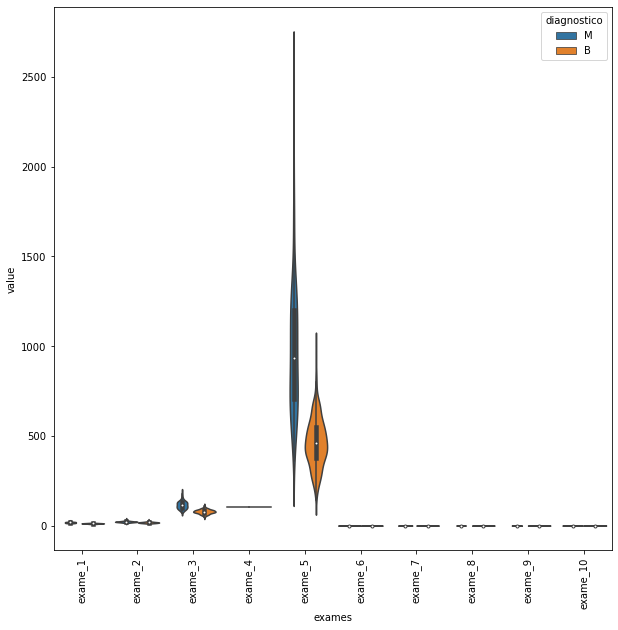

In [62]:
#Para entender através de visualização, teremos que usar nesse caso o,o gráfico de violino
import seaborn as sns
import matplotlib.pyplot as plt

#Gráfico
plt.figure(figsize=(10,10))
sns.violinplot(x= "exames", y="value", hue="diagnostico",
              data=dados_plot)
plt.xticks(rotation =90) #deixa na vertical as legendas do eixo x

plt.show()

**Melhorando a visualização**

In [64]:
#Primeiro vamos realizar a padronização
from sklearn.preprocessing import StandardScaler

padronizador= StandardScaler() #criando a instânica
padronizador.fit(valores_exames_v1)#fazer o padronizador se adaptar aos nossos dados
valores_exames_v2 = padronizador.transform(valores_exames_v1)#realizar tambem uma transformação nesses dados

In [66]:
#Como retornou um array, precisamos transformar em um dataframe com as chaves das coluna da v1
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, 
                                columns=valores_exames_v1.keys())

In [67]:
valores_exames_v2.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.0,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.0,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.0,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.0,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.0,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.0,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.0,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.0,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.0,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.0,0.729259,-0.868353,-0.397100


### Pronto, agora refazemos o processo com os dados normalizados e transformados

In [68]:
#temos muitos valores no eixo x, sendo assim vamos plotar de 10 em 10
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1)

#Nesse caso quero as colunas exames, valores e diagnostico, portanto usar funçao melt
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames")

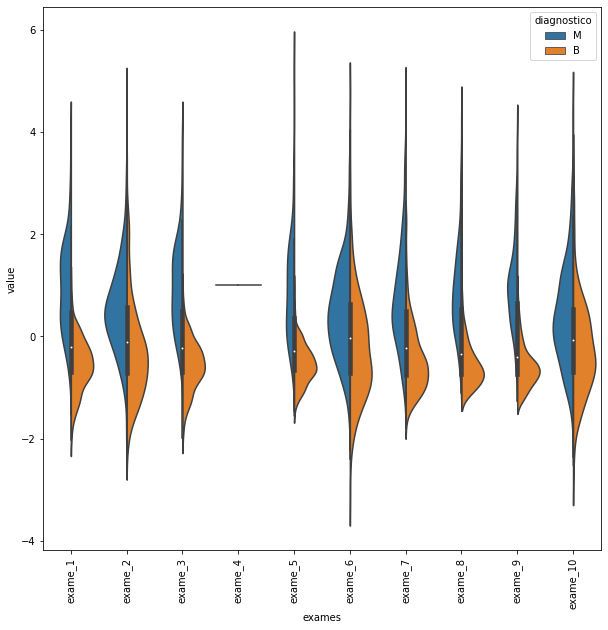

In [73]:
#Gráfico
plt.figure(figsize=(10,10))
sns.violinplot(x= "exames", y="value", hue="diagnostico",
              data=dados_plot, split=True)
plt.xticks(rotation =90) #deixa na vertical as legendas do eixo x

plt.show()

Exame 4 tem um comportamento diferente

In [76]:
valores_exames_v2.exame_4

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    1.0
Name: exame_4, Length: 569, dtype: float64

Percebe-se que o mesmo tem o valor constante.

Como a variavel tem valor constante, podemos eliminar ela, pq no caso nao conseguimos disntiguir valores diferentes em M e B

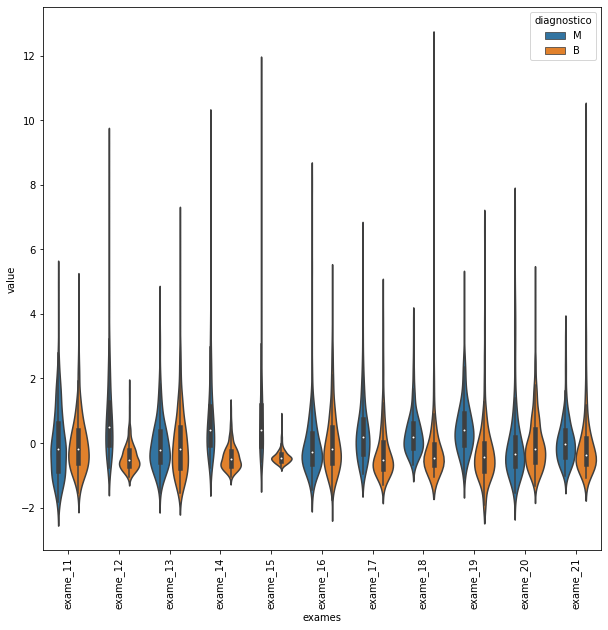

In [79]:
#Vamos criar uma função para realizar analise de valores constantes e dos demais blocos no caso do 10 ao 21
def grafico_violino(valores, inicio, fim):
    
        dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)
        dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames")
    
    
        #Gráfico
        plt.figure(figsize=(10,10))
        sns.violinplot(x= "exames", y="value", hue="diagnostico",
                                                data=dados_plot)
        plt.xticks(rotation =90) #deixa na vertical as legendas do eixo x

grafico_violino(valores_exames_v2, 10, 21)

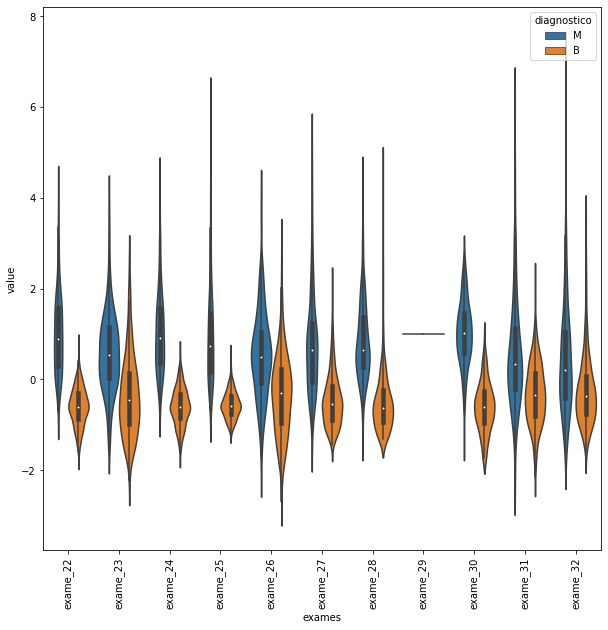

In [80]:
#blocos do 21 ao 32
grafico_violino(valores_exames_v2, 21, 32)

Constantamos mais um elemento com dados constantes

In [83]:
#Removendo os dados constantes no caso exame 4 e exame 29

valores_exames_v3 = valores_exames_v2.drop(columns=["exame_4", "exame_29"])

#Refazendo a classficação do modelo baseline, agora sem as duas variaveis
def classificar(valores):
    seed = 1234
    random.seed(seed)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                diagnostico, test_size=0.3) #definindo tamanho para 30% dos dados pra teste
    print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len(teste_x)))
    
    # Numero de arvores será 100 e definindo para o  treino
    classificador = RandomForestClassifier(n_estimators= 100)
    classificador.fit(treino_x, treino_y)
    classificador = classificador.score(teste_x, teste_y)
    print("Resultado do classificador %.2f%%" % (classificador *100))

classificar(valores_exames_v3)

Treinaremos com 398 elementos e testaremos com 171 elementos
Resultado do classificador 92.98%


Mesmo reduzindo nossos dados, nao perdemos na qualidade, que nesse caso nível da baseline esta ok

### Correlação dos dados 

<AxesSubplot:>

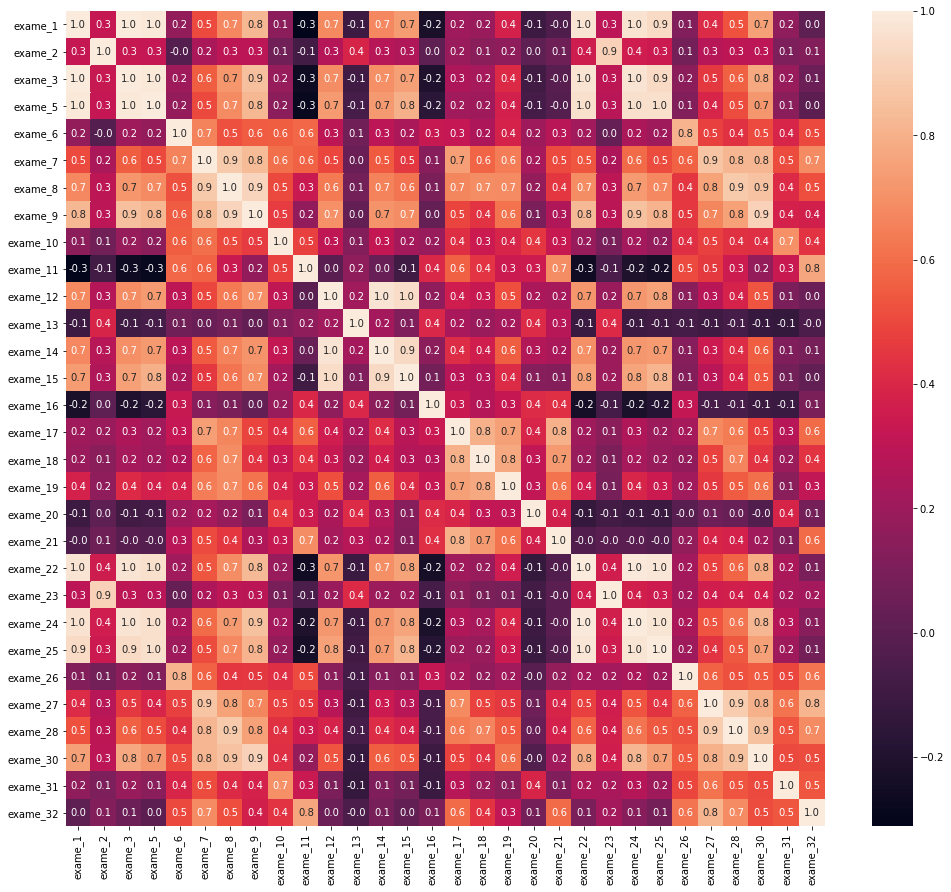

In [90]:
#Para mostra a correlação dos dados diferente da matriz, vamos utilizar o heatmap do seaborn
correlacao = valores_exames_v3.corr()

plt.figure(figsize=(17,15))
sns.heatmap(correlacao, annot= True, fmt =".1f")

In [97]:
#Selecionando somente as correlações fortes positivas para remover, vamos trabalhar somente com as correlacoa fracas
correlacao_v1 = correlacao[correlacao>0.99]
correlacao_v1.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#verificando as variaveis altamente correlacionadas
correlacao_v2 = correlacao_v1.sum()
correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [99]:
variaveis_correlacionadas = correlacao_v2[correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Pronto descobrimos as variaveis altamente correlacionadas e vamos tira-las do nosso dataset

In [150]:
#removendo as variaves
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [151]:
#verificando a qualidade do nosso baseline apos remover as variaveis
classificar(valores_exames_v4)

Treinaremos com 398 elementos e testaremos com 171 elementos
Resultado do classificador 91.81%


Nesse caso o resultado abaixo da base, devido ter feito o drop com todas as 4, vamos escolher duas somenmte

In [152]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v5)

Treinaremos com 398 elementos e testaremos com 171 elementos
Resultado do classificador 92.98%


Agora sim, tiramos duas features e não comprometeu nossa baseline

In [174]:
#Agora vamos selecionar as melhores features(exames) da nossa base de acordo com uma pontução usando uma função sklearn
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 #gerar a pontuação

#Nesse caso selecionar apenas 10 exames com a qualidade do algoritmo, e possivel?
selecionar_kmelhores = SelectKBest(chi2, k = 10) #realizar apenas 10 exames

In [175]:
selecionar_kmelhores

SelectKBest(score_func=<function chi2 at 0x0000013CFAA80AF0>)

In [176]:
#como nao aceita negativos, vamos voltar a v1 e retirar as features a posteriori
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

In [177]:
#Agora vamos avaliar o modelo e separar em treino e teste
seed=1234
random.seed(seed)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                diagnostico, test_size=0.3) #definindo tamanho para 30% dos dados pra teste
print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len(teste_x)))

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

Treinaremos com 398 elementos e testaremos com 171 elementos


In [178]:
#Pronto como selecionamos apenas 10 features(exames) somente as 10 serão mostradas com maior pontuaão
treino_kbest.shape

(398, 10)

In [179]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("Resultado do classificador %.2f%%" % (classificador.score(teste_kbest, teste_y)*100))

Resultado do classificador 95.91%


Com 30% das features(exames) que corresponde a 10 exames, nosso modelo atingiu 95% de eficácia

### Matriz de Confusão


Como tiramos bastante features e nosso modelo teve um score alto, será que por outro lado nao esteja sendo deficiente ou causando um impacto? Será que to acertando somente o câncer do tipo beligno e errando mais o cÂncer do tipo maligno?

In [180]:
#importando biblioteca
from sklearn.metrics import confusion_matrix

In [181]:
#instanciando
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[105,   0],
       [  7,  59]], dtype=int64)

[Text(0.5, 15.0, 'Predição'), Text(33.0, 0.5, 'Real')]

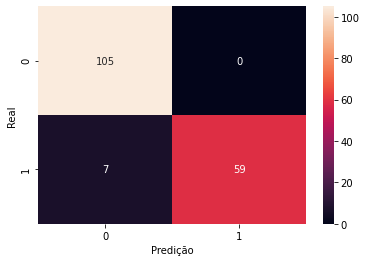

In [182]:
#Melhorando análise
#Para mostra da matriz de confusão, vamos utilizar o heatmap do seaborn
#d numero inteiro
sns.heatmap(matriz_confusao, annot= True, fmt ="d").set(xlabel = "Predição", ylabel="Real")

Bom, de 105 exames de câncer beligno realizado,  105 são acertivos. Agora, de 66 exames de câncer maligno, 59 deles são acertivos, os demais houve equívoco ou erro. Agora pensa, uma pessoa com câncer maligno faz um exame e nele não consta. Isso é grave, pois na próxima vez que realizar novamente o exame,  pode estar em estágio final.

### RFE - Eliminação de Feature(exames) por recursão

In [184]:
#importando bilbioteca
from sklearn.feature_selection import RFE

Resultado do classificador 92.98%


[Text(0.5, 15.0, 'Predição'), Text(33.0, 0.5, 'Real')]

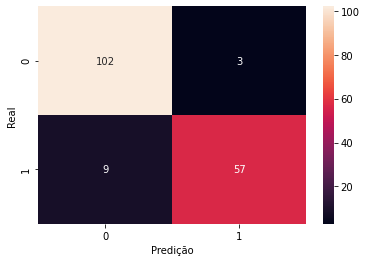

In [200]:
seed=1234
random.seed(seed)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                diagnostico, test_size=0.3) #definindo tamanho para 30% dos dados pra teste

# Numero de arvores será 100 e definindo para o  treino
classificador = RandomForestClassifier(n_estimators= 100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator=classificador,  n_features_to_select=10, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

#classficação
classificador.fit(treino_rfe, treino_y)
print("Resultado do classificador %.2f%%" % (classificador.score(teste_rfe, teste_y)*100))

#instanciando
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

#Melhorando análise
#Para mostra da matriz de confusão, vamos utilizar o heatmap do seaborn
#d numero inteiro
sns.heatmap(matriz_confusao, annot= True, fmt ="d").set(xlabel = "Predição", ylabel="Real")

podemos concluir q o kbest e se comporta melhor com nossos dados, tanto na acurácia quanto na matriz de confusão.

Mas qual é o melhor conjunto de feautures que gera melhor resultado? Por que, acima escolhi 10 com as melhores pontuações. Mas se existe outros? vamos usar RFECV

### RFECV - Eliminação de Feature(exames) por recursão usando validação cruzada

In [190]:
#importando bilbioteca
from sklearn.feature_selection import RFECV

Resultado do classificador 92.98%


[Text(0.5, 15.0, 'Predição'), Text(33.0, 0.5, 'Real')]

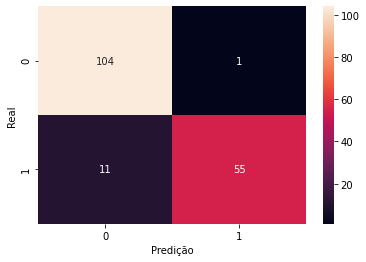

In [191]:
#semente
seed=1234
random.seed(seed)

#separação dos dados
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                diagnostico, test_size=0.3) #definindo tamanho para 30% dos dados pra teste

# Numero de arvores será 100 e definindo para o  treino
classificador = RandomForestClassifier(n_estimators= 100, random_state=1234)
classificador.fit(treino_x, treino_y)

#cv em quantos vamos dividir
#função de avaliação sera o score
selecionador_rfecv = RFECV(estimator=classificador, cv = 10, step=1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

#classficação
classificador.fit(treino_rfecv, treino_y)
print("Resultado do classificador %.2f%%" % (classificador.score(teste_rfecv, teste_y)*100))

#instanciando
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))

#Melhorando análise
#Para mostra da matriz de confusão, vamos utilizar o heatmap do seaborn
#d numero inteiro
sns.heatmap(matriz_confusao, annot= True, fmt ="d").set(xlabel = "Predição", ylabel="Real")

Tivemos uma melhora em casos beligno, mas o numero de erro no maligno aumentou. Contudo a acurácia do modelo foi idêntica ao RFE. 

Porém vamos descobrir quais features ele buscou

In [192]:
selecionador_rfecv.n_features_in_

28

No caso ele selecionou 28 features exames, para ter o melhor resultado.

In [193]:
#Mas queremos saber quais foram.
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_20', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [194]:
#verificando o score de cada feature
selecionador_rfecv.grid_scores_

array([0.88923077, 0.93455128, 0.95717949, 0.95717949, 0.96467949,
       0.96217949, 0.96217949, 0.96217949, 0.95467949, 0.96217949,
       0.96217949, 0.96467949, 0.96467949, 0.97217949, 0.96467949,
       0.96974359, 0.96724359, 0.96724359, 0.96224359, 0.97474359,
       0.96224359, 0.96217949, 0.97224359, 0.96474359, 0.96474359,
       0.97467949, 0.95967949, 0.96474359])

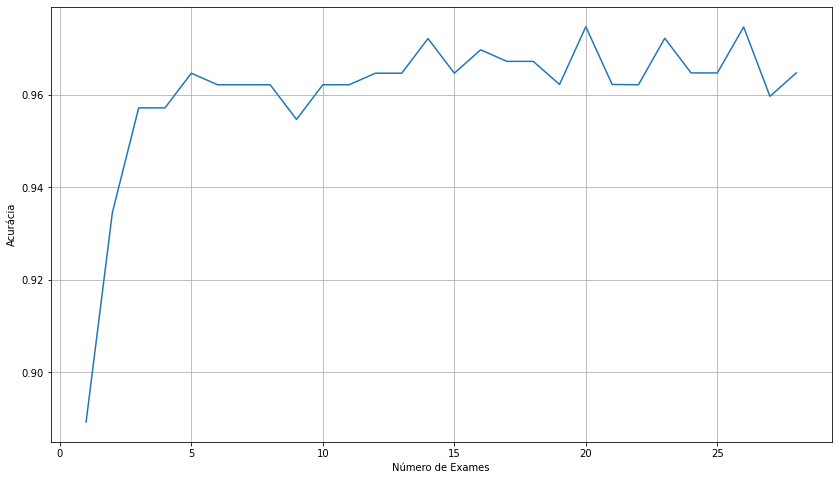

In [195]:
#vamos entender o porque o modelo escolheu esses features
plt.figure(figsize=(14,8))
plt.xlabel("Número de Exames")
plt.ylabel("Acurácia")
plt.grid()
#definindo o tamanho  eixo y 
plt.plot(range(1, len(selecionador_rfecv.grid_scores_)+1), selecionador_rfecv.grid_scores_)

plt.show()

Podemos ver que as 28 selecionados e onde temos um score mais alto, por isso o algoritmo escolheu

### Visualizando dados no plano

In [197]:
dados

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


Resultado do classificador 87.13%


[Text(0.5, 15.0, 'Predição'), Text(33.0, 0.5, 'Real')]

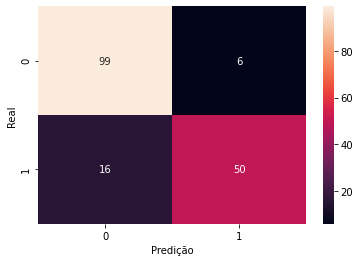

In [201]:
#Vamos criar com apenas duas dimensoes para conseguir plotar

seed=1234
random.seed(seed)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                diagnostico, test_size=0.3) #definindo tamanho para 30% dos dados pra teste

# Numero de arvores será 100 e definindo para o  treino
classificador = RandomForestClassifier(n_estimators= 100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator=classificador,  n_features_to_select=2, step=1) #duas features somente
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

#classficação
classificador.fit(treino_rfe, treino_y)
print("Resultado do classificador %.2f%%" % (classificador.score(teste_rfe, teste_y)*100))

#instanciando
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

#Melhorando análise
#Para mostra da matriz de confusão, vamos utilizar o heatmap do seaborn
#d numero inteiro
sns.heatmap(matriz_confusao, annot= True, fmt ="d").set(xlabel = "Predição", ylabel="Real")

In [202]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

pronto reduzimos para duas dimensões

In [203]:
valores_exames_v7

array([[0.1471 , 0.2654 ],
       [0.07017, 0.186  ],
       [0.1279 , 0.243  ],
       ...,
       [0.05302, 0.1418 ],
       [0.152  , 0.265  ],
       [0.     , 0.     ]])

<AxesSubplot:>

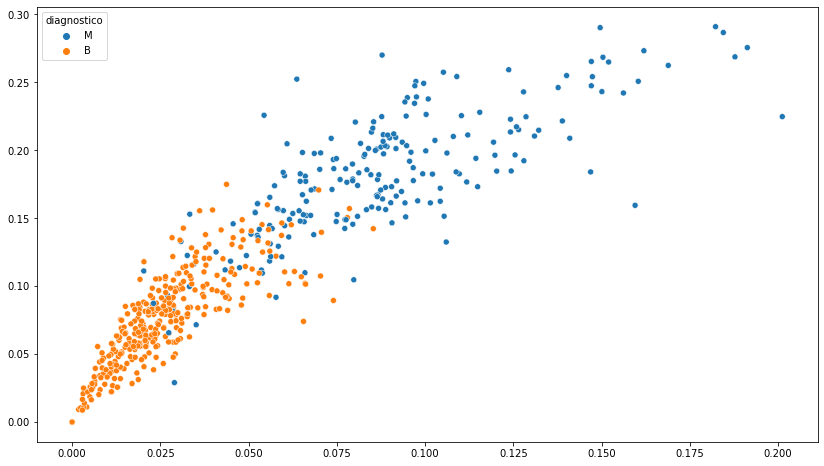

In [206]:
#vamos plotar
#x vamos pegar todas as linhas e a primeira coluna pq esta como array 
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1] , hue = diagnostico)

Estamos perdendo muita informação, para que isso nao ocorra vamos utilizar PCA. Pois conseguimos manter o máximo de informação possivel, com uma dimensonalidade reduzida.

### PCA

In [207]:
#importando
from sklearn.decomposition import PCA

In [212]:
#instanciando
pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5) #os dados da v5 esta normalizados por isso e mais recomendado

In [213]:
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

<AxesSubplot:>

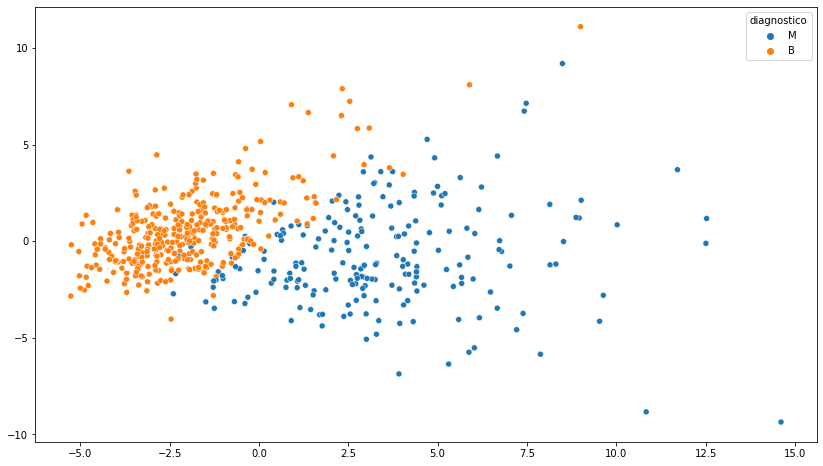

In [214]:
#vamos plotar
#x vamos pegar todas as linhas e a primeira coluna pq esta como array 
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1] , hue = diagnostico)

In [215]:
#Existe outra forma que é muito boa para esses casos a TSNE pois ele calcula a diferença das distancia dentro de uma dimensao 
# de 28 variaveis
#importando
from sklearn.manifold import TSNE

<AxesSubplot:>

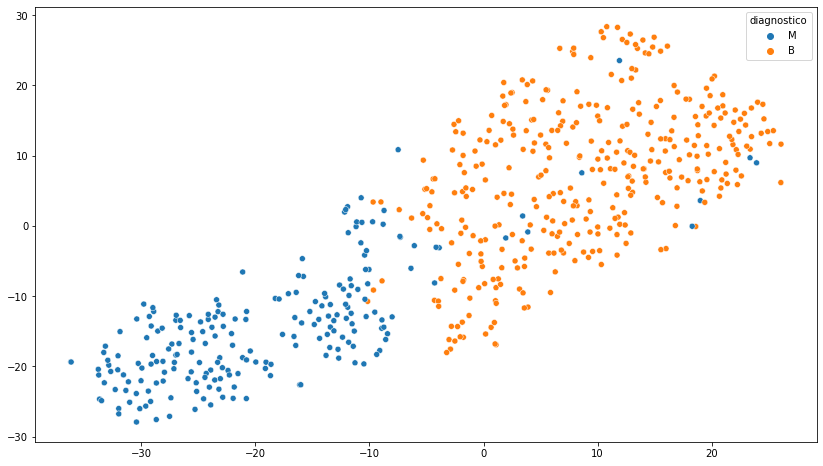

In [216]:
#instanciando
tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5) #os dados da v5 esta normalizados por isso e mais recomendado


plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1] , hue = diagnostico)